# Importing important packages

In [156]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler

# Reading CSV file to DataFrame

In [157]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [158]:
df.drop(['education'],axis=1,inplace=True)

# Checking for any NaN values

In [159]:
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Checking all are in numerical values

In [160]:
df.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

# Filling NaN values with mean and mode

In [161]:
li=['cigsPerDay','BPMeds','totChol','heartRate','glucose']
for i in li:
  df[i]=df[i].fillna(df[i].mode()[0])
df['BMI']=df['BMI'].fillna(df['BMI'].mean())
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,75.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# Making sure there are no NaN values

In [162]:
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Splitting the dataset into input and output variables

In [163]:
x=df.iloc[:,:-1]
x

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,75.0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [164]:
df["diabetes"].value_counts()

0    4131
1     109
Name: diabetes, dtype: int64

In [165]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64

# Checking if the dataset is imbalanced

In [166]:
y.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

# Since the dataset is imbalanced, we use overfitting

In [167]:
os=SMOTE(random_state=1)
x_os,y_os=os.fit_resample(x,y)

In [168]:
y_os.value_counts()

0    3596
1    3596
Name: TenYearCHD, dtype: int64

# Scaling the input variables to a same range

In [169]:
mms=MinMaxScaler()
x_new=mms.fit_transform(x_os,y_os)
x_new

array([[1.        , 0.18421053, 0.        , ..., 0.27702375, 0.36363636,
        0.10451977],
       [0.        , 0.36842105, 0.        , ..., 0.31968008, 0.51515152,
        0.10169492],
       [1.        , 0.42105263, 1.        , ..., 0.23751818, 0.31313131,
        0.08474576],
       ...,
       [0.        , 0.57894737, 0.        , ..., 0.27330258, 0.49574304,
        0.0960452 ],
       [0.        , 0.73684211, 0.        , ..., 0.42519489, 0.21874882,
        0.18352656],
       [1.        , 0.44736842, 0.        , ..., 0.30948462, 0.21867182,
        0.09449293]])

# Splitting the dataset into train and test datas

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_os,random_state=1,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5034, 14), (2158, 14), (5034,), (2158,))

# Performing classification algorithms

KNN
Accuracy= 76.73772011121409
              precision    recall  f1-score   support

           0       0.82      0.68      0.74      1074
           1       0.73      0.86      0.79      1084

    accuracy                           0.77      2158
   macro avg       0.78      0.77      0.77      2158
weighted avg       0.78      0.77      0.77      2158

SVC
Accuracy= 71.36237256719184
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      1074
           1       0.70      0.75      0.72      1084

    accuracy                           0.71      2158
   macro avg       0.71      0.71      0.71      2158
weighted avg       0.71      0.71      0.71      2158

GaussianNB
Accuracy= 61.53846153846154
              precision    recall  f1-score   support

           0       0.58      0.85      0.69      1074
           1       0.72      0.38      0.50      1084

    accuracy                           0.62      2158
   macro avg       0.65  

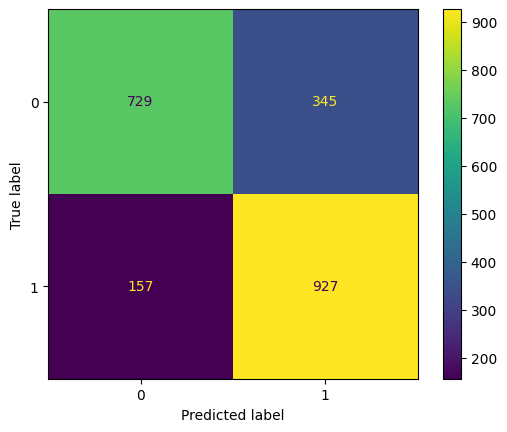

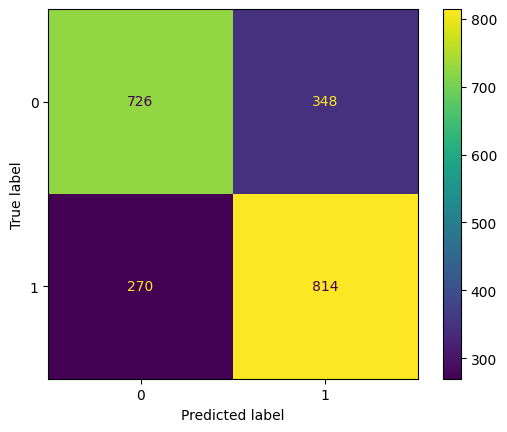

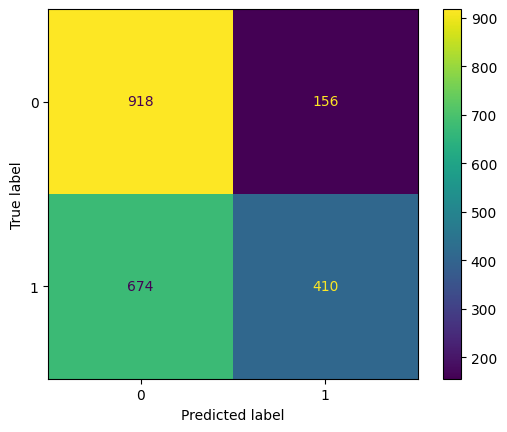

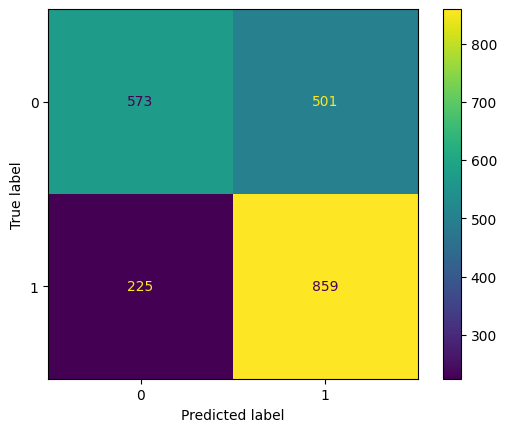

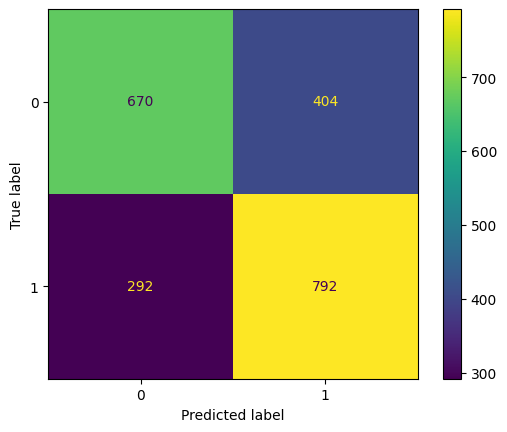

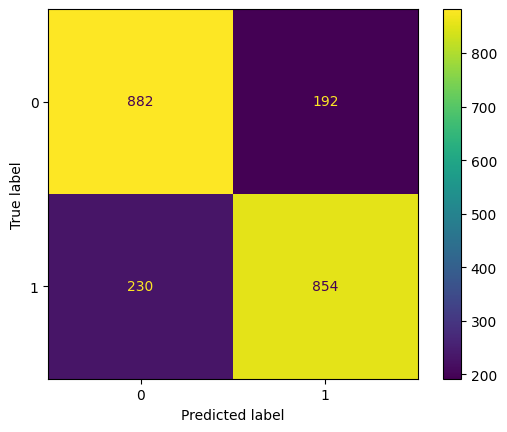

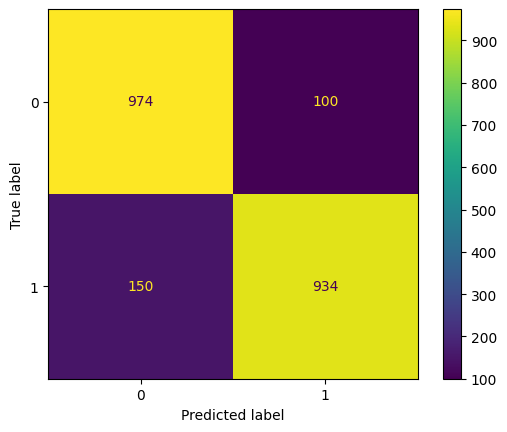

In [171]:
knn=KNeighborsClassifier(n_neighbors=5)
sv=SVC(kernel='rbf')
gnb=GaussianNB()
dtc=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4)
rfc=RandomForestClassifier(n_estimators=200,random_state=1,criterion='entropy',max_depth=4)
ad=AdaBoostClassifier(n_estimators=200,random_state=1)
xgb=XGBClassifier(n_estimators=200,random_state=1)
models=[knn,sv,gnb,dtc,rfc,ad,xgb]
names=['KNN','SVC','GaussianNB','Decision Tree','Random Forest Classifier','AdaBoost','XGBoost']
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  i=models.index(model)
  print(names[i])
  print("Accuracy=", accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

# Hyperparameter tuning of these classification algorithms

In [172]:
params_knn={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
params_sv = {'kernel': ['rbf', 'linear', 'poly']}
params_dtc={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8,9,10],'random_state':[1,2,3,4,5,6,7,8,9,10]}
params_ad={'n_estimators': [50, 100, 200],'random_state':[1,2,3,4,5,6,7,8,9,10]}
params_xgb={'n_estimators':[50,100,200],'random_state':[1,2,3,4,5,6,7,8,9,10]}
clf_knn=GridSearchCV(knn,params_knn,cv=5,scoring='accuracy')
clf_sv=GridSearchCV(sv,params_sv,cv=5,scoring='accuracy')
clf_dtc=GridSearchCV(dtc,params_dtc,cv=5,scoring='accuracy')
clf_ad=GridSearchCV(ad,params_ad,cv=5,scoring='accuracy')
clf_xgb=GridSearchCV(xgb,params_xgb,cv=5,scoring='accuracy')
clf_knn.fit(x_train,y_train)
clf_sv.fit(x_train,y_train)
clf_dtc.fit(x_train,y_train)
clf_ad.fit(x_train,y_train)
clf_xgb.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             param_grid={'n_estimators': [50, 100, 200],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [173]:
print("Best Parameters:")
print("KNeighbours Classifier:",clf_knn.best_params_)
print("SVC:",clf_sv.best_params_)
print("DecisionTree Classifier:",clf_dtc.best_params_)
print("AdaBoost Classifier:",clf_ad.best_params_)
print("XGB Classifier:",clf_xgb.best_params_)

Best Parameters:
KNeighbours Classifier: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
SVC: {'kernel': 'poly'}
DecisionTree Classifier: {'criterion': 'gini', 'max_depth': 10, 'random_state': 5, 'splitter': 'best'}
AdaBoost Classifier: {'n_estimators': 200, 'random_state': 1}
XGB Classifier: {'n_estimators': 200, 'random_state': 1}


In [174]:
params_rfc = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
}
clf_rfc = GridSearchCV(rfc, params_rfc, cv=5, scoring='accuracy', n_jobs=-1)
clf_rfc.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=4,
                                              n_estimators=200,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 300], 'random_state': [42]},
             scoring='accuracy')

In [175]:
print("Random Forest Classifier:",clf_rfc.best_params_)

Random Forest Classifier: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}


# Doing the classification algorithm with the updated parameters

KNN
Accuracy= 80.53753475440223
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1074
           1       0.76      0.89      0.82      1084

    accuracy                           0.81      2158
   macro avg       0.81      0.80      0.80      2158
weighted avg       0.81      0.81      0.80      2158

SVC
Accuracy= 70.38924930491196
              precision    recall  f1-score   support

           0       0.69      0.75      0.71      1074
           1       0.72      0.66      0.69      1084

    accuracy                           0.70      2158
   macro avg       0.71      0.70      0.70      2158
weighted avg       0.71      0.70      0.70      2158

GaussianNB
Accuracy= 61.53846153846154
              precision    recall  f1-score   support

           0       0.58      0.85      0.69      1074
           1       0.72      0.38      0.50      1084

    accuracy                           0.62      2158
   macro avg       0.65  

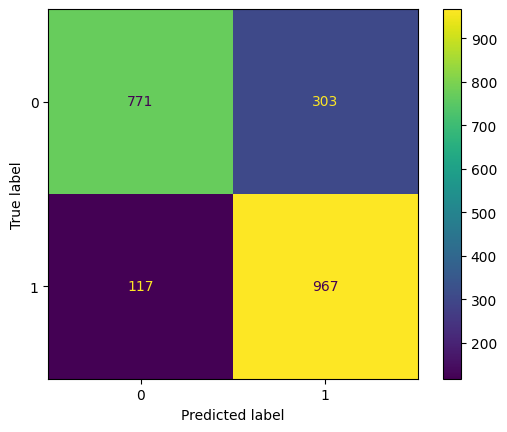

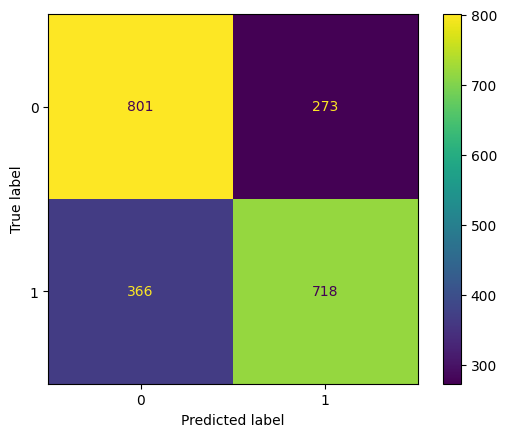

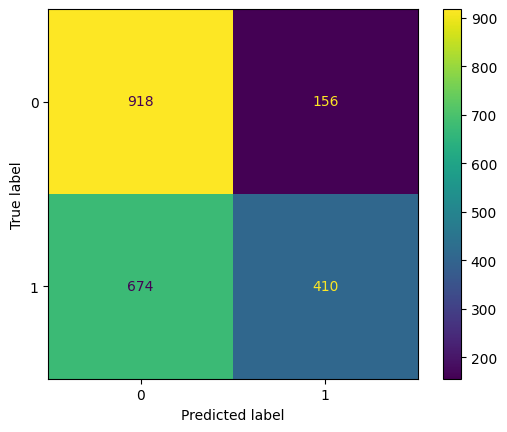

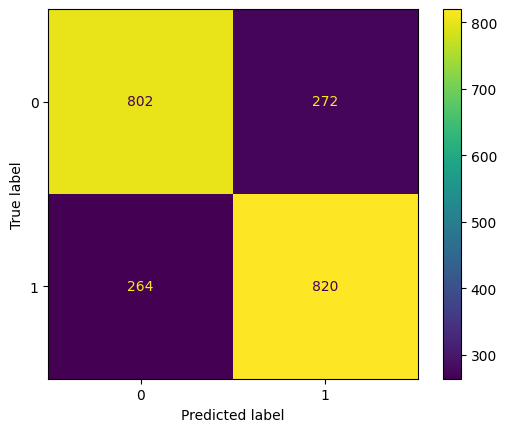

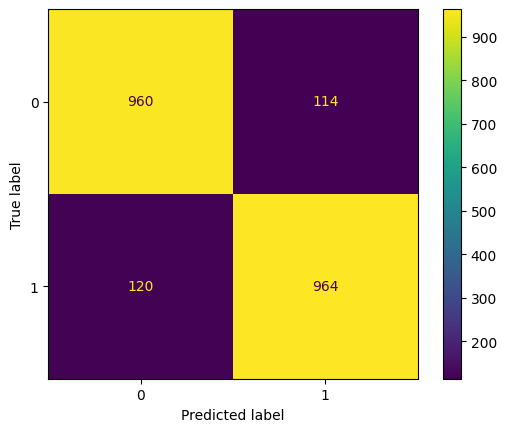

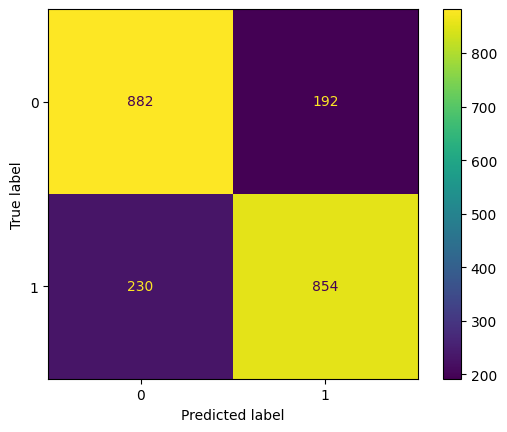

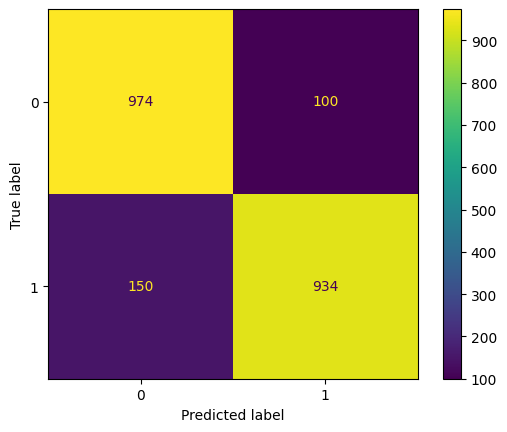

In [176]:
knn1=KNeighborsClassifier(algorithm='auto', n_neighbors=3, weights='distance')
sv1=SVC(kernel='poly')
gnb1=GaussianNB()
dtc1=DecisionTreeClassifier(random_state=5,splitter='best',criterion='gini',max_depth=10)
rfc1=RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=42,max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2)
ad1=AdaBoostClassifier(n_estimators=200,random_state=1)
xgb1=XGBClassifier(n_estimators=200,random_state=1)
models1=[knn1,sv1,gnb1,dtc1,rfc1,ad1,xgb1]
names1=['KNN','SVC','GaussianNB','Decision Tree','Random Forest Classifier','AdaBoost','XGBoost']
for model1 in models1:
  model1.fit(x_train,y_train)
  y_pred1=model1.predict(x_test)
  i=models1.index(model1)
  print(names1[i])
  print("Accuracy=", accuracy_score(y_test,y_pred1)*100)
  print(classification_report(y_test,y_pred1))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))

In [177]:
df['prevalentHyp'].value_counts()

0    2923
1    1317
Name: prevalentHyp, dtype: int64

In [178]:
y.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

# Performing underfitting

In [179]:
us=RandomUnderSampler(random_state=1)
x_us,y_us=us.fit_resample(x,y)

In [180]:
y_us.value_counts()

0    644
1    644
Name: TenYearCHD, dtype: int64

# Scaling the input variables to a same range

In [181]:
mms2=MinMaxScaler()
x_us_new=mms2.fit_transform(x_us)
x_us_new

array([[1.        , 0.84210526, 1.        , ..., 0.1596474 , 0.3375    ,
        0.08757062],
       [0.        , 0.47368421, 1.        , ..., 0.09598433, 0.375     ,
        0.13276836],
       [0.        , 0.23684211, 0.        , ..., 0.64128306, 0.5625    ,
        0.09887006],
       ...,
       [1.        , 0.68421053, 0.        , ..., 0.2470617 , 0.275     ,
        0.10169492],
       [1.        , 0.94736842, 0.        , ..., 0.17580803, 0.1875    ,
        0.11016949],
       [1.        , 0.47368421, 1.        , ..., 0.24510284, 0.2625    ,
        0.1299435 ]])

# Splitting the dataset into train and test datas

In [182]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x_us_new,y_us,random_state=1)
x_train2.shape,x_test2.shape,y_train2.shape,y_test2.shape

((966, 14), (322, 14), (966,), (322,))

# Performing classification algorithms

KNN
Accuracy= 56.52173913043478
              precision    recall  f1-score   support

           0       0.57      0.56      0.57       163
           1       0.56      0.57      0.56       159

    accuracy                           0.57       322
   macro avg       0.57      0.57      0.57       322
weighted avg       0.57      0.57      0.57       322

SVC
Accuracy= 65.527950310559
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       163
           1       0.64      0.69      0.66       159

    accuracy                           0.66       322
   macro avg       0.66      0.66      0.66       322
weighted avg       0.66      0.66      0.66       322

GaussianNB
Accuracy= 55.90062111801242
              precision    recall  f1-score   support

           0       0.54      0.96      0.69       163
           1       0.79      0.14      0.24       159

    accuracy                           0.56       322
   macro avg       0.66    

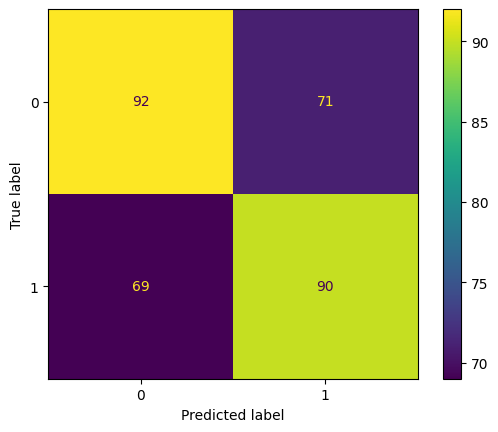

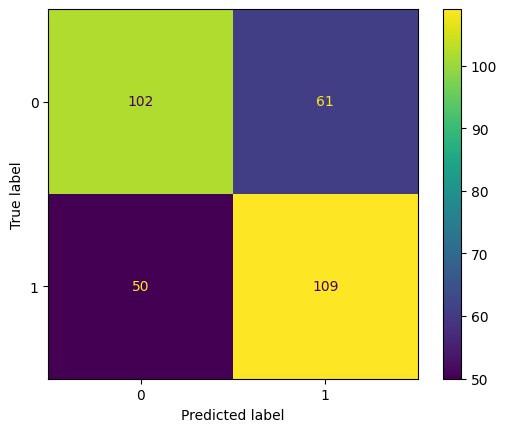

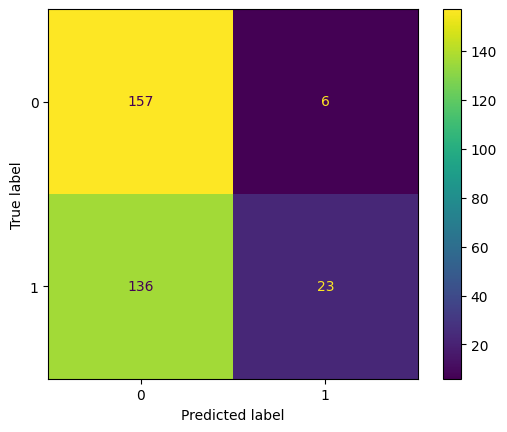

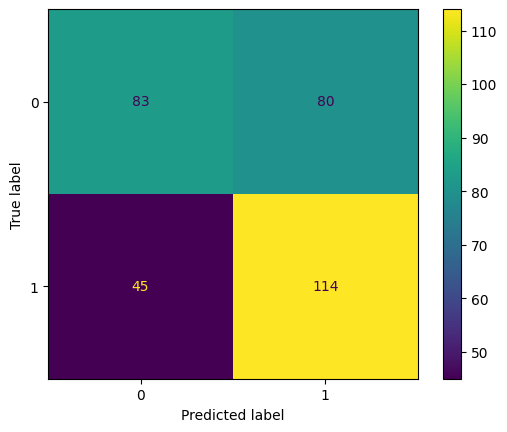

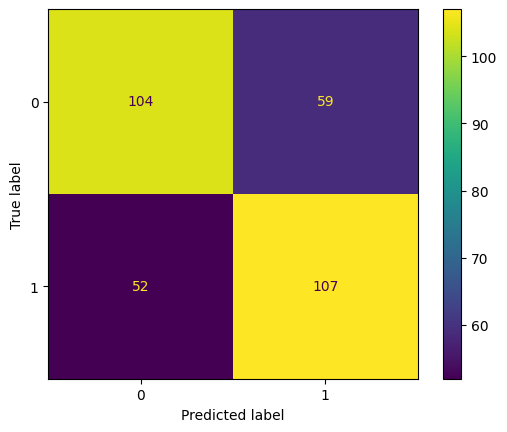

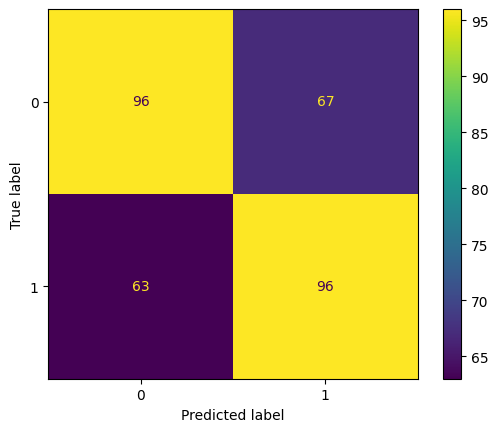

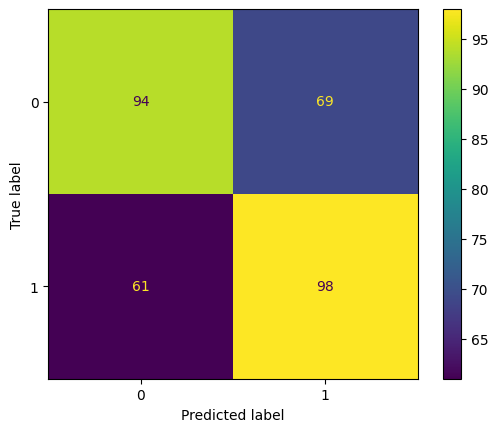

In [183]:
knn2=KNeighborsClassifier(n_neighbors=5)
sv2=SVC(kernel='rbf')
gnb2=GaussianNB()
dtc2=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4)
rfc2=RandomForestClassifier(n_estimators=200,random_state=1,criterion='entropy',max_depth=4)
ad2=AdaBoostClassifier(n_estimators=200,random_state=1)
xgb2=XGBClassifier(n_estimators=200,random_state=1)
models2=[knn2,sv2,gnb2,dtc2,rfc2,ad2,xgb2]
names2=['KNN','SVC','GaussianNB','Decision Tree','Random Forest Classifier','AdaBoost','XGBoost']
for model2 in models2:
  model2.fit(x_train2,y_train2)
  y_pred2=model2.predict(x_test2)
  i=models2.index(model2)
  print(names2[i])
  print("Accuracy=", accuracy_score(y_test2,y_pred2)*100)
  print(classification_report(y_test2,y_pred2))
  print(ConfusionMatrixDisplay.from_predictions(y_test2,y_pred2))

# Hyperparameter tuning of these classification algorithms

In [184]:
params_knn2={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
params_sv2 = {'kernel': ['rbf', 'linear', 'poly']}
params_dtc2={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8,9,10],'random_state':[1,2,3,4,5,6,7,8,9,10]}
params_ad2={'n_estimators': [50, 100, 200],'random_state':[1,2,3,4,5,6,7,8,9,10]}
params_xgb2={'n_estimators':[50,100,200],'random_state':[1,2,3,4,5,6,7,8,9,10]}
clf_knn2=GridSearchCV(knn2,params_knn,cv=5,scoring='accuracy')
clf_sv2=GridSearchCV(sv2,params_sv,cv=5,scoring='accuracy')
clf_dtc2=GridSearchCV(dtc2,params_dtc,cv=5,scoring='accuracy')
clf_ad2=GridSearchCV(ad2,params_ad,cv=5,scoring='accuracy')
clf_xgb2=GridSearchCV(xgb2,params_xgb,cv=5,scoring='accuracy')
clf_knn2.fit(x_train2,y_train2)
clf_sv2.fit(x_train2,y_train2)
clf_dtc2.fit(x_train2,y_train2)
clf_ad2.fit(x_train2,y_train2)
clf_xgb2.fit(x_train2,y_train2)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             param_grid={'n_estimators': [50, 100, 200],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [185]:
print("Best Parameters:")
print("KNeighbours Classifier:",clf_knn2.best_params_)
print("SVC:",clf_sv2.best_params_)
print("DecisionTree Classifier:",clf_dtc2.best_params_)
print("AdaBoost Classifier:",clf_ad2.best_params_)
print("XGB Classifier:",clf_xgb2.best_params_)

Best Parameters:
KNeighbours Classifier: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
SVC: {'kernel': 'linear'}
DecisionTree Classifier: {'criterion': 'entropy', 'max_depth': 4, 'random_state': 1, 'splitter': 'best'}
AdaBoost Classifier: {'n_estimators': 50, 'random_state': 1}
XGB Classifier: {'n_estimators': 50, 'random_state': 1}


In [186]:
params_rfc2 = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
}
clf_rfc2 = GridSearchCV(rfc2, params_rfc2, cv=5, scoring='accuracy', n_jobs=-1)
clf_rfc2.fit(x_train2, y_train2)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=4,
                                              n_estimators=200,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 300], 'random_state': [42]},
             scoring='accuracy')

In [187]:
print("Random Forest Classifier:",clf_rfc2.best_params_)

Random Forest Classifier: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42}


# Doing the classification algorithm with the updated parameters

KNN
Accuracy= 59.93788819875776
              precision    recall  f1-score   support

           0       0.60      0.61      0.61       163
           1       0.60      0.58      0.59       159

    accuracy                           0.60       322
   macro avg       0.60      0.60      0.60       322
weighted avg       0.60      0.60      0.60       322

SVC
Accuracy= 66.45962732919256
              precision    recall  f1-score   support

           0       0.68      0.63      0.66       163
           1       0.65      0.70      0.67       159

    accuracy                           0.66       322
   macro avg       0.67      0.67      0.66       322
weighted avg       0.67      0.66      0.66       322

GaussianNB
Accuracy= 55.90062111801242
              precision    recall  f1-score   support

           0       0.54      0.96      0.69       163
           1       0.79      0.14      0.24       159

    accuracy                           0.56       322
   macro avg       0.66  

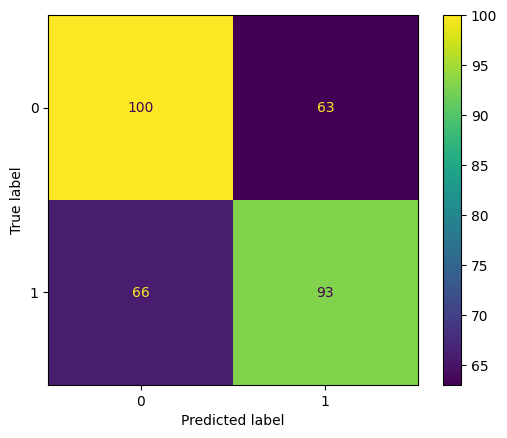

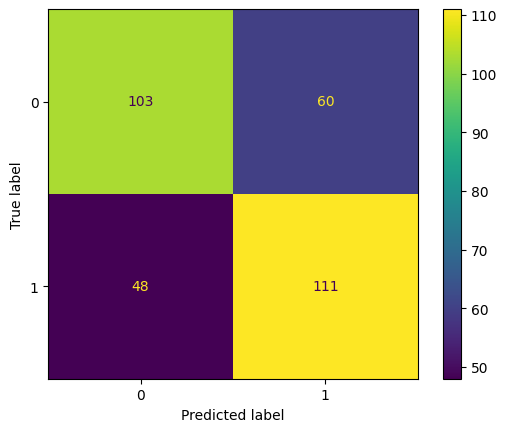

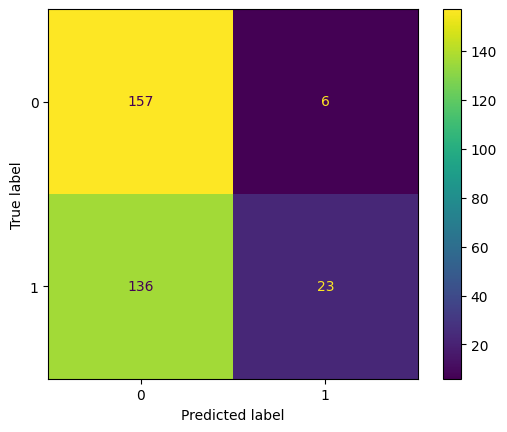

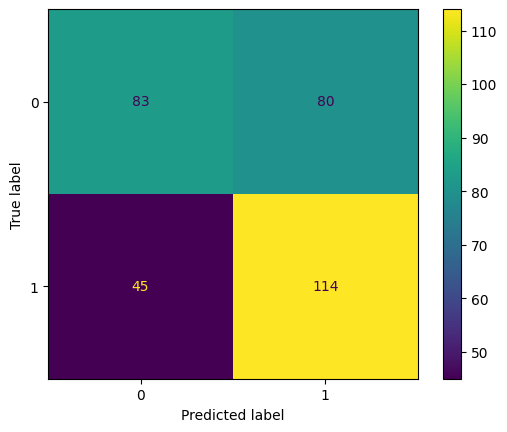

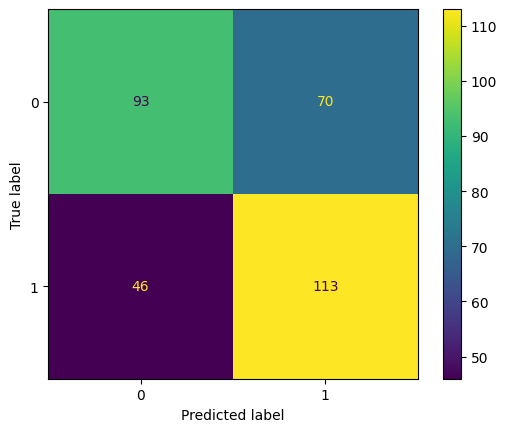

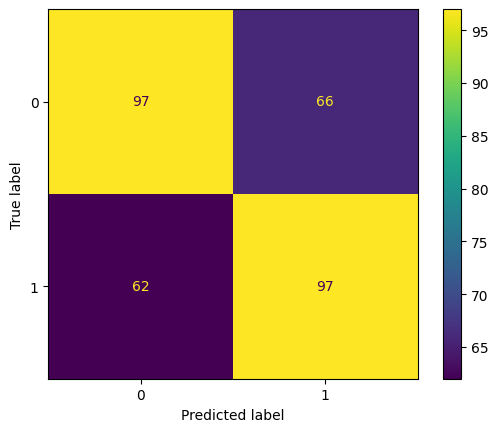

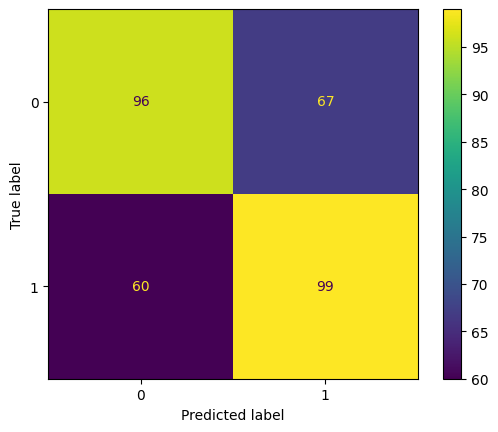

In [189]:
knn2_new=KNeighborsClassifier(algorithm='auto', n_neighbors=9, weights='distance')
sv2_new=SVC(kernel='linear')
gnb2_new=GaussianNB()
dtc2_new=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4,splitter='best')
rfc2_new=RandomForestClassifier(n_estimators=300,random_state=42,criterion='gini',max_depth=None,max_features='sqrt',min_samples_leaf=2,min_samples_split=5)
ad2_new=AdaBoostClassifier(n_estimators=50,random_state=1)
xgb2_new=XGBClassifier(n_estimators=50,random_state=1)
models2_new=[knn2_new,sv2_new,gnb2_new,dtc2_new,rfc2_new,ad2_new,xgb2_new]
names2_new=['KNN','SVC','GaussianNB','Decision Tree','Random Forest Classifier','AdaBoost','XGBoost']
for model2_new in models2_new:
  model2_new.fit(x_train2,y_train2)
  y_pred2_new=model2_new.predict(x_test2)
  i=models2_new.index(model2_new)
  print(names2_new[i])
  print("Accuracy=", accuracy_score(y_test2,y_pred2_new)*100)
  print(classification_report(y_test2,y_pred2_new))
  print(ConfusionMatrixDisplay.from_predictions(y_test2,y_pred2_new))

In [190]:
# The best model is RandomForest Classifier at n_estimators=300,criterion='entropy',random_state=42,max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2
# with oversampling
# Accuracy=89.1566265060241

# Saving the model of Random Forest Classifier model(with overfitting) and its scaler

In [191]:
import pickle
pickle.dump(rfc1,open("model_framingham1.sav","wb"))
pickle.dump(mms,open("scaler_framingham1.sav","wb"))